In [212]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from utils_stats.site_frequency_spectrum import site_frequency_spectrum
from utils_stats.site_frequency_spectrum_beta import site_frequency_spectrum_beta
from utils_stats.site_frequency_spectrum_normalized import site_frequency_spectrum_normalized

In [213]:
alpha_true = 2
beta_true = 5
num_sites = 1000
num_genomes = 100

In [214]:
x = np.linspace(0, 1, 100)
bin_width = (x.max() - x.min()) / len(x)
scaling_factor = num_sites * bin_width

simulated_allele_frequencies = np.random.beta(alpha_true, beta_true, size=num_sites)
simulated_allele_counts = np.random.binomial(num_genomes, simulated_allele_frequencies)
simulated_allele_frequency_spectrum = np.bincount(simulated_allele_counts)
simulated_beta = stats.beta.pdf(x, alpha_true, beta_true) * scaling_factor

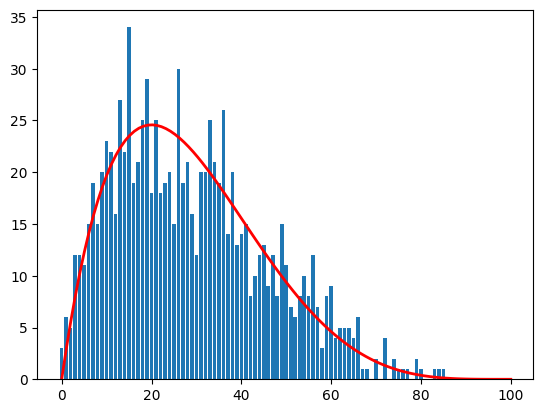

In [215]:
plt.bar(range(len(simulated_allele_frequency_spectrum)), simulated_allele_frequency_spectrum)
plt.plot(x * num_genomes, simulated_beta, 'r-', lw=2, label='True Beta Distribution')

In [216]:
estimated_allele_frequency_spectrum = site_frequency_spectrum(simulated_allele_counts)
estimated_allele_frequency_spectrum_normalized = site_frequency_spectrum_normalized(simulated_allele_counts)
alpha_est, beta_est = site_frequency_spectrum_beta(simulated_allele_counts, num_genomes)

In [217]:
print(f"True alpha: {alpha_true}, True beta: {beta_true}")
print(f"Estimated alpha: {alpha_est}, Estimated beta: {beta_est}")

True alpha: 2, True beta: 5
Estimated alpha: 1.7793085645879143, Estimated beta: 4.348373205143939


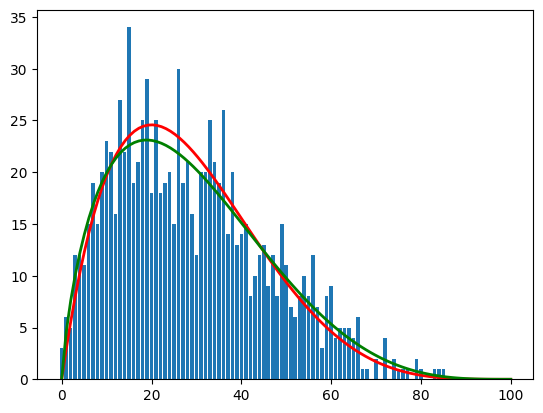

In [218]:
plt.bar(range(len(estimated_allele_frequency_spectrum)), estimated_allele_frequency_spectrum)
plt.plot(x * num_genomes, simulated_beta, 'r-', lw=2, label='True Beta Distribution')
plt.plot(x * num_genomes, stats.beta.pdf(x, alpha_est, beta_est) * scaling_factor, 'g-', lw=2, label='Estimated Beta Distribution')